### 1. 라이브러리 불러오기

In [1]:
import warnings

In [2]:
warnings.filterwarnings(action="ignore")

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

### 2. 데이터 불러오기 및 분리

In [16]:
imageList = []
labelList = []
IMG_SIZE = 28

In [5]:
basedir = "../images/MNIST/trainingSet/"

In [6]:
categories = os.listdir(basedir)

In [7]:
categories

['0_zero',
 '1_one',
 '2_two',
 '3_three',
 '4_four',
 '5_five',
 '6_six',
 '7_seven',
 '8_eight',
 '9_nine']

In [17]:
#폴더 순환
for i in range(0, len(categories)):

    labelPath = os.path.join(basedir,categories[i])
    imagePath = os.listdir(labelPath)
    #이미지 순환
    for j in range(0,len(imagePath)):
        imageFullPath = os.path.join(labelPath, imagePath[j])
        try:
            baseimg = cv2.imread(imageFullPath,cv2.IMREAD_GRAYSCALE)
            ### 1. 이미지 사이즈 변경
            ### 2. 이미지 칼러 변경(이미 완료)
            refinedImg = cv2.resize(baseimg, (IMG_SIZE,IMG_SIZE))
            #plt.imshow(refinedImg)
            imageList.append(refinedImg)
            labelList.append(i)
        except Exception as e:
            print(e, imageFullPath)
            pass

In [18]:
imageArray = np.array(imageList)

In [19]:
labelArray = np.array(labelList)

In [20]:
imageArray.shape
labelArray.shape

(42000,)

In [25]:
from sklearn.model_selection import train_test_split

In [33]:
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels =\
train_test_split(imageArray, labelArray, test_size= 0.2, random_state=2)

In [41]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600,)
(8400,)


In [39]:
trainingData_features = trainingData_features.reshape(len(trainingData_feature),IMG_SIZE,IMG_SIZE,1)
testData_features = testData_features.reshape(len(testData_features),IMG_SIZE,IMG_SIZE,1)

In [40]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600,)
(8400,)


In [42]:
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

In [46]:
trainingData_labels_one[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

### 3. 모델 생성

In [48]:
inputShape = trainingData_features[0].shape
inputShape

(28, 28, 1)

In [50]:
outputShape = len(categories)

### 4. 모델 컴파일

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [79]:
# 모델 생성 시작
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

In [80]:
model.add(MaxPooling2D(pool_size=2))

In [81]:
model.add(Dropout(rate=0.4)) ##사용할 비율을 설정

In [82]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

In [83]:
model.add(MaxPooling2D(pool_size=2))

In [84]:
model.add(Flatten())

In [85]:
model.add(Dense(units=outputShape,
               activation="softmax"))

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [87]:
from tensorflow.keras.utils import plot_model

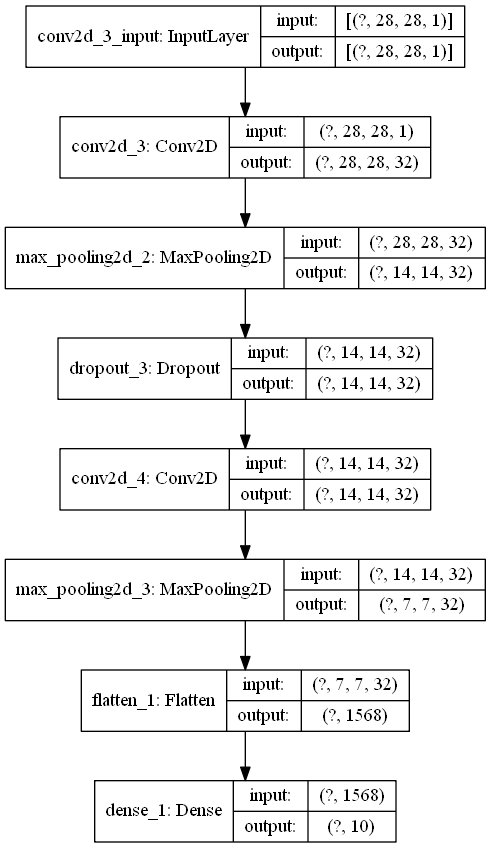

In [88]:
plot_model(model, show_shapes=True)

In [89]:
##loss, merics,optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### 5. 모델 학습

In [90]:
33600 / 32 ##가중치 변경 횟수

1050.0

In [91]:
epochNo = 5

In [92]:
trainingData_feature_norm[0].shape

(28, 28, 1)

In [93]:
model.fit(x=trainingData_feature_norm,y=trainingData_labels_one, epochs=epochNo,
          batch_size = 32,
         validation_data=(testData_features_norm,testData_labels_one))

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 17s 519us/sample - loss: 0.3054 - accuracy: 0.9086 - val_loss: 0.1060 - val_accuracy: 0.9663
Epoch 2/5
33600/33600 [==============================] - 18s 543us/sample - loss: 0.1060 - accuracy: 0.9675 - val_loss: 0.0685 - val_accuracy: 0.9782
Epoch 3/5
33600/33600 [==============================] - 19s 566us/sample - loss: 0.0785 - accuracy: 0.9755 - val_loss: 0.0671 - val_accuracy: 0.9788
Epoch 4/5
33600/33600 [==============================] - 19s 562us/sample - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.0541 - val_accuracy: 0.9823
Epoch 5/5
33600/33600 [==============================] - 19s 569us/sample - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0485 - val_accuracy: 0.9850


### 6. 모델 추론

In [94]:
model.evaluate(x = testData_features_norm, y = testData_labels_one)

8400/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.048485720656989584, 0.985]

### 7. 모델 예측

In [109]:
testData = cv2.imread("d:/sample_image.PNG", cv2.IMREAD_COLOR)

In [108]:
def refineImage(testImg):
    ## 테스트 이미지 컬러 변경
    ## 컬러이미지 -> 회색톤으로 변경
    IMG_SIZE = 28
    img_gray= cv2.cvtColor(testimg,cv2.COLOR_RGB2GRAY)

    ## 사이즈 조정
    img_resize = cv2.resize(img_gray,(IMG_SIZE,IMG_SIZE))

    ## shape 변경
    img_shape = img_resize.reshape(1,IMG_SIZE,IMG_SIZE,1)

    img_shape.shape

    ## 정규화
    img_norm = img_shape/255.0
    
    return img_norm

In [110]:
refinedImageOne = refineImage(testData)

In [112]:
np.argmax(model.predict(refinedImageOne))

5

### 모델 저장

In [114]:
model_json = model.to_json()
with open("d:\model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("d:\model_mnist_kopo_weight.h5")